In [3]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [6]:
text = open('text.txt', encoding='utf-8').read().lower()
print('Length:', len(text))

Length: 581888


In [9]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
# print(words)

In [11]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [12]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [14]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1
    
print(X[0][0])

[False False False ... False False False]


In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [16]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
811/811 [==============================] - 167s 206ms/step - loss: 6.0180 - accuracy: 0.1070 - val_loss: 7.0598 - val_accuracy: 0.0979
Epoch 2/2
811/811 [==============================] - 175s 216ms/step - loss: 5.7808 - accuracy: 0.1470 - val_loss: 7.9494 - val_accuracy: 0.1077


In [17]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [20]:
history

{'loss': [6.018005847930908, 5.780757427215576],
 'accuracy': [0.10696903616189957, 0.1470426619052887],
 'val_loss': [7.059813976287842, 7.9494194984436035],
 'val_accuracy': [0.09794946759939194, 0.10765287280082703]}

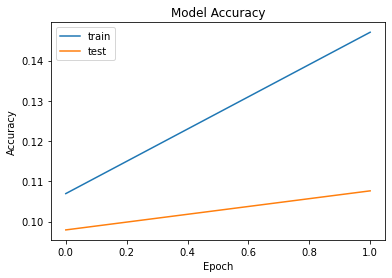

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

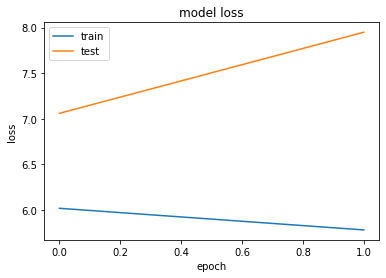

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Word Prediction Model